<a href="https://colab.research.google.com/github/balamurugan-shanmuganathan/AppliedNLPMaterial-Udemy/blob/master/Copy_of_DRL_Assgn1_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `---------------Mandatory Information to fill------------`

### Group ID:
### Group Members Name with Student ID:
1. Balamurugan S - 2023AA05145
2. Rahul Dutt Sharma - 2023AA05140
3. Sethu Sidharth S - 2023AA05774
4. Vigneshwar S - 2023AB05117


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Background

In digital advertising, Click-Through Rate (CTR) is a critical metric that measures the effectiveness of an advertisement. It is calculated as the ratio of users who click on an ad to the number of users who view the ad. A higher CTR indicates more successful engagement with the audience, which can lead to increased conversions and revenue. From time-to-time advertisers experiment with various elements/targeting of an ad to optimise the ROI.

# Scenario

Imagine an innovative digital advertising agency, AdMasters Inc., that specializes in maximizing click-through rates (CTR) for their clients' advertisements. One of their clients has identified four key tunable elements in their ads: *Age*, *City*, *Gender*, and *Mobile Operating System (OS)*. These elements significantly influence user engagement and conversion rates. The client is keen to optimize their CTR while minimizing resource expenditure.

# Objective

Optimize the CTR of digital ads by employing Multi Arm Bandit algorithms. System should dynamically and efficiently allocate ad displays to maximize overall CTR.


# Dataset

The dataset for Ads contains 4 unique features/characteristics.
*   Age (Range: 25:50)
*   City (Possible Values: &#39;New York&#39;, &#39;Los Angeles&#39;, &#39;Chicago&#39;,&#39;Houston&#39;, &#39;Phoenix&#39;)
*   Gender (Possible Values: &#39;Male&#39;, &#39;Female&#39;)
*   OS: (Possible Values: &#39;iOS&#39;, &#39;Android&#39;, &#39;Other&#39;)

***Link for accessing dataset:***
https://drive.google.com/file/d/1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys/view?usp=sharing


# Environment Details

**Arms:** Each arm represents a different ad from the dataset.

**Reward Function:**
* Probability of a Male clicking on an Ad -> 0.7 (randomly generated)
* Probability of a Female clicking on an Ad -> 0.6 (randomly generated)
* Once probabilities are assigned to all the values, create a final reward (clicked or not clicked binary outcome) based on the assumed probabilities in step 1 (by combining the probabilities of each feature value present in that ad)

**Assumptions**
* Assume alpha = beta = 1 for cold start
* Explore Percentage = 10%
* Run the simulation for min 1000 iterations


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [1]:
# Constants
epsilon = 0.1
gender_click_prob = {'Male': 0.7, 'Female': 0.6}

#get random probability values for the features
def get_random_probabilities(feature):
    """
    Purpose:
    Create a dictionary with random probabilities for each distinct value in a specified feature of a dataset.

    Description:
    This function accepts the name of a feature (column) from the dataset and generates a dictionary of random probabilities.
    Each unique value within the feature is mapped to a randomly generated probability, rounded to two decimal places. This
    approach can be utilized for purposes like simulating click probabilities, initializing random weights, or other stochastic
    modeling tasks.

    Parameters:
    - feature (str): The name of the feature (column) in the dataset for which to generate random probabilities.

    Returns:
    - prob_dict (dict): A dictionary where keys are unique values from the specified feature and values are the
                        corresponding random probabilities (rounded to two decimal places).
    """
    unique_values = set(data[feature].values)
    probabilities = {value: round(random.random(), 2) for value in unique_values}
    return probabilities

# Total probability function
def calculate_click_probability(age, gender, city, os):
    """
    Purpose:
    Calculate the likelihood of a user clicking on an advertisement based on demographic and technical characteristics.

    Description:
    This function estimates the click probability for a user by evaluating their age, gender, city, and operating system.
    It utilizes predefined probability distributions for each attribute to compute the overall click probability. The process
    includes:
    1. Identifying the age bucket for the given age.
    2. Retrieving the click probability for the identified age bucket.
    3. Retrieving the click probability for the specified gender.
    4. Retrieving the click probability for the specified city.
    5. Retrieving the click probability for the specified operating system.
    6. Multiplying the individual probabilities to obtain the combined click probability.

    Parameters:
    - age (int): The age of the user.
    - gender (str): The gender of the user.
    - city (str): The city where the user resides.
    - os (str): The operating system of the user's device.

    Returns:
    - click_probability (float): The estimated probability of the user clicking on an advertisement, calculated as the
                                 product of individual probabilities related to age, gender, city, and operating system.
    """
    age_bucket = data[data.Age == age]['Age_bucket'].values[0]
    age_probability = age_click_prob[age_bucket]
    gender_probability = gender_click_prob[gender]
    city_probability = city_click_prob[city]
    os_probability = os_click_prob[os]
    return age_probability * gender_probability * city_probability * os_probability

# Load Dataset

In [2]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset from the provided CSV file
data = pd.read_csv('DRL Assgn1 PartA.csv')

# Display the first few rows of the dataset to verify loading
print("Dataset preview:")
print(data.head())

Dataset preview:
   Age Gender         City Phone_OS
0   25   Male     New York      iOS
1   25   Male     New York  Android
2   25   Male     New York    Other
3   25   Male  Los Angeles      iOS
4   25   Male  Los Angeles  Android


In [3]:
"""
Print Dataset Statistics
"""
print(data.describe().T,end='\n\n\n')
print(data.describe(include='O').T)

     count  mean       std   min   25%   50%   75%   max
Age  780.0  37.5  7.504812  25.0  31.0  37.5  44.0  50.0


         count unique       top freq
Gender     780      2      Male  390
City       780      5  New York  156
Phone_OS   780      3       iOS  260


In [4]:
def categorize_age(age):
    """
    Purpose:
    Group a given age into predefined age ranges.

    Description:
    This function assigns an age to an age range category based on predefined intervals. The intervals are:
    - '25-30' for ages from 25 up to but not including 30
    - '30-35' for ages from 30 up to but not including 35
    - '35-40' for ages from 35 up to but not including 40
    - '40-45' for ages from 40 up to but not including 45
    - '45-50' for ages from 45 to 50 inclusive
    If the age is outside these ranges, the function returns None.

    Parameters:
    - age (int): The age to be categorized.

    Returns:
    - age_group (str or None): The corresponding age range as a string, or None if the age does not match any range.
    """

    if 25 <= age < 30:
        return '25-30'
    elif 30 <= age < 35:
        return '30-35'
    elif 35 <= age < 40:
        return '35-40'
    elif 40 <= age < 45:
        return '40-45'
    elif 45 <= age <= 50:
        return '45-50'
    else:
        return None

# Apply the age categorization function to the 'Age' column in the dataset
data['Age_bucket'] = data['Age'].apply(categorize_age)

In [5]:
"""
Initialize the click probabilities for different cities,phones and age buckets.

"""

# Initialize click probabilities for various features
city_click_prob = get_random_probabilities('City')
os_click_prob = get_random_probabilities('Phone_OS')
age_click_prob = get_random_probabilities('Age_bucket')

# Design a CTR Environment (1M)

In [6]:
# Code for Environment along with reward function
#-----write your code below this line---------

class CTREnvironment:
    def __init__(self, data):
        """
        Purpose:
        Initialize the environment with a dataset of advertisements.

        Parameters:
        - data: A dataset containing advertisement data, where each row represents an ad with attributes
                such as age, gender, city, operating system, and age bucket.

        Description:
        The constructor method initializes the CTR Environment class by storing the advertisement data
        in an instance variable. This allows the environment to access and manipulate the data for
        subsequent operations.

        """

        self.ads = data.values

    def get_reward(self, ad):
        """
        Purpose:
        Calculate the reward (click or no click) for displaying a specific ad.

        Parameters:
        - ad: A tuple containing the attributes of the ad (age, gender, city, operating system, age bucket).

        Returns:
        - reward (int): Returns 1 if the ad is clicked, otherwise returns 0.

        Description:
        The method extracts the attributes (age, gender, city, operating system, age bucket) from the ad.
        It then calculates the click probability using the calculate_click_probability function.
        A random number is generated and compared to the click probability to determine if the ad is clicked.
        If the random number is less than or equal to the click probability, the method returns 1 (indicating a click);
        otherwise, it returns 0.

        """
        # Extract ad attributes
        age,  gender,city, os,age_bck = ad
        # Calculate the click probability for the ad
        click_prob = calculate_click_probability(age,  gender,city, os)
        # Determine if the ad is clicked based on the click probability
        return 1 if random.random() <= click_prob else 0

In [7]:
# defining a simulation function as we can reuse the code for different policy methods.
def run_simulation(policy, num_iterations=1000):
    """
    Purpose:
    Run a simulation of an advertisement selection policy in a click-through rate (CTR) environment.

    Description:
    This function initializes the CTR environment using the provided data and runs a simulation for the specified number
    of iterations. In each iteration, the function selects an advertisement using the provided policy, determines if the
    ad results in a click (reward), and stores the reward. If the policy has an UPDATE method, the policy is updated
    based on the observed reward. The function prints the selected ad and the reward for each iteration and returns a list
    of rewards.

    Parameters:
    - policy: An object representing the advertisement selection policy. The policy must have a SELECT_AD method, and
      optionally, an UPDATE method.
    - num_iterations (int, default=1000): The number of iterations to run the simulation.

    Returns:
    - rewards (list): A list of rewards obtained in each iteration, where each reward is 1 if the ad resulted in a click,
      and 0 otherwise.

    """
    # Initialize the CTR environment using the given data
    env = CTREnvironment(data)
    # List to store rewards from each iteration
    rewards = []
    # Extract ads from the environment
    ads = env.ads

    # Loop over the specified number of iterations
    for i in range(num_iterations):
        # Select an advertisement using the policy's selection method
        ad = policy.select_ad(ads)
        #print('**************',ad)
        # Determine the reward for the selected ad
        reward = env.get_reward(ad)
        # Store the reward in the list
        rewards.append(reward)
        # If the policy has an update method, use it to update the policy with the observed reward
        if hasattr(policy, 'update'):
            policy.update(ad, reward)

        # Print the selected ad and the corresponding reward for this iteration
        print(f"Iteration {i+1}: Selected Ad - {ad}, Reward - {reward}")

    # Return the list of rewards obtained in the simulation
    return rewards

# Using Random Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [8]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------
class RandomPolicy:
    def select_ad(self, ads):
        """
        Purpose:
        Select an advertisement randomly from the list of available ads.

        Description:
        This method takes a list of advertisements and returns one ad selected at random. The selection is done using the
        random.choice function, which ensures that each ad has an equal probability of being selected.

        Parameters:
        - ads (list): A list of advertisements, where each ad is represented by a tuple of user attributes.

        Returns:
        - ad (tuple): A randomly selected advertisement from the list.
        """

        # Randomly select and return an ad from the list of ads
        return random.choice(ads)

In [9]:
# Define the number of iterations for the simulation
num_iterations = 1000

# Create an instance of the RandomPolicy class
random_policy = RandomPolicy()

# This function call simulates the ad selection process for the specified number of iterations
random_rewards = run_simulation(random_policy, num_iterations)

Iteration 1: Selected Ad - [49 'Female' 'Phoenix' 'Android' '45-50'], Reward - 0
Iteration 2: Selected Ad - [33 'Female' 'New York' 'Android' '30-35'], Reward - 1
Iteration 3: Selected Ad - [31 'Male' 'New York' 'Android' '30-35'], Reward - 0
Iteration 4: Selected Ad - [33 'Male' 'Chicago' 'Android' '30-35'], Reward - 0
Iteration 5: Selected Ad - [40 'Male' 'Phoenix' 'Android' '40-45'], Reward - 0
Iteration 6: Selected Ad - [50 'Male' 'Houston' 'Other' '45-50'], Reward - 0
Iteration 7: Selected Ad - [32 'Male' 'Chicago' 'iOS' '30-35'], Reward - 0
Iteration 8: Selected Ad - [39 'Male' 'Chicago' 'Other' '35-40'], Reward - 0
Iteration 9: Selected Ad - [39 'Male' 'Los Angeles' 'Android' '35-40'], Reward - 1
Iteration 10: Selected Ad - [27 'Female' 'Houston' 'Android' '25-30'], Reward - 0
Iteration 11: Selected Ad - [42 'Female' 'Los Angeles' 'iOS' '40-45'], Reward - 0
Iteration 12: Selected Ad - [41 'Female' 'Los Angeles' 'iOS' '40-45'], Reward - 0
Iteration 13: Selected Ad - [34 'Female' 

# Using Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [10]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------
class GreedyPolicy:
    def __init__(self,explore):
        """
        Initializes the GreedyPolicy with the given exploration threshold and sets
        up dictionaries to track ad performance metrics.

        Parameters:
        - explore (int): The number of initial ad displays for exploration before
                         exploiting the best-performing ad.
        """

        self.clicks = {}  # Dictionary to store the number of clicks for each ad
        self.shown = {}   # Dictionary to store the number of times each ad has been shown
        self.ctr = {}     # Dictionary to store the click-through rate (CTR) of each ad
        self.explore = explore  # Number of ad displays dedicated to exploration
        self.max_ctr = -1  # Initial maximum CTR set to an invalid value
        self.best_ad = None  # Placeholder for the best ad

    def select_ad(self, ads):
        """
        Purpose:
        Select an advertisement based on the current phase (exploration or exploitation).

        Description:
        During the exploration phase, this method selects an ad randomly from the list of available ads.
        During the exploitation phase, it selects the best-performing ad based on the highest click-through rate (CTR).

        Parameters:
        - ads (list): A list of advertisements, where each ad is represented by a tuple of ad attributes.

        Returns:
        - ad (tuple): The selected advertisement from the list.
        """
        while True:
            ad=random.choice(ads)
            ad_tuple = tuple(ad)
            if self.explore <= sum(self.shown.values()):
                ctr = round(self.clicks.get(ad_tuple,0) / self.shown.get(ad_tuple,1),3)
                if ctr > self.max_ctr:
                    self.best_ad = ad
                return self.best_ad
            else:
                return ad

    def update(self, ad, reward):
        """
        Purpose:
        Update the performance metrics for a displayed ad.

        Description:
        This method updates the tracking dictionaries for clicks and impressions when an ad is shown. It calculates
        the click-through rate (CTR) and updates the best-performing ad based on the highest CTR observed.

        Parameters:
        - ad (tuple): The ad that was displayed.
        - reward (int): The reward received (1 for click, 0 for no click).
        """

        ad_tuple = tuple(ad)
        if ad_tuple in self.clicks:
            self.clicks[ad_tuple] += reward
            self.shown[ad_tuple] += 1
            self.ctr[ad_tuple] = round(self.clicks.get(ad_tuple) / self.shown.get(ad_tuple),3)
        else:
            self.clicks[ad_tuple] = reward
            self.shown[ad_tuple] = 1
            self.ctr[ad_tuple] = round(self.clicks.get(ad_tuple) / self.shown.get(ad_tuple),3)
        #to assign best ad out of the lot based on the ctr value
        self.best_ad=sorted(self.ctr.items(),key=lambda x:x[1],reverse=True)[0][0]
        self.max_ctr=sorted(self.ctr.items(),key=lambda x:x[1],reverse=True)[0][1]

In [11]:
#Initializing the Greedy Policy Object with exploration value of 50

greedy_policy = GreedyPolicy(explore=50)

#Running the Simulation of Greedy policy of 1000 iterations
greedy_rewards = run_simulation(greedy_policy, num_iterations)

Iteration 1: Selected Ad - [36 'Male' 'New York' 'Other' '35-40'], Reward - 0
Iteration 2: Selected Ad - [50 'Female' 'New York' 'iOS' '45-50'], Reward - 0
Iteration 3: Selected Ad - [48 'Female' 'New York' 'Other' '45-50'], Reward - 0
Iteration 4: Selected Ad - [39 'Female' 'Chicago' 'Android' '35-40'], Reward - 1
Iteration 5: Selected Ad - [50 'Male' 'Phoenix' 'Other' '45-50'], Reward - 0
Iteration 6: Selected Ad - [42 'Female' 'Chicago' 'Android' '40-45'], Reward - 0
Iteration 7: Selected Ad - [29 'Female' 'Chicago' 'iOS' '25-30'], Reward - 0
Iteration 8: Selected Ad - [37 'Male' 'Phoenix' 'Android' '35-40'], Reward - 0
Iteration 9: Selected Ad - [33 'Female' 'Houston' 'Android' '30-35'], Reward - 0
Iteration 10: Selected Ad - [43 'Female' 'Chicago' 'Other' '40-45'], Reward - 0
Iteration 11: Selected Ad - [36 'Male' 'New York' 'Other' '35-40'], Reward - 0
Iteration 12: Selected Ad - [34 'Female' 'Houston' 'Other' '30-35'], Reward - 0
Iteration 13: Selected Ad - [37 'Male' 'Chicago' 

# Using Epsilon-Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [12]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------
class EpsilonGreedyPolicy:
    def __init__(self,epsilon, explore):
        """
        Purpose:
        Initializes the EpsilonGreedyPolicy with the given epsilon value and exploration threshold.
        Sets up dictionaries to track ad performance metrics.

        Parameters:
        - epsilon (float): The probability of selecting a random ad instead of the best-performing one.
        - explore (int): The number of initial ad displays for exploration before exploiting the best-performing ad.
        """
        self.epsilon = epsilon
        self.explore = explore
        self.clicks = {}      # Dictionary to store the number of clicks for each ad
        self.shown = {}       # Dictionary to store the number of times each ad has been shown
        self.ctr={}           # Dictionary to store the click-through rate (CTR) of each ad
        self.max_ctr = -1     # Initial maximum CTR set to an invalid value
        self.best_ad = None   # Placeholder for the best ad

    def select_ad(self, ads):
        """
        Purpose:
        Select an advertisement based on the current phase (exploration or exploitation).

        Description:
        During the exploration phase, this method selects an ad randomly from the list of available ads.
        During the exploitation phase, it selects the best-performing ad based on the highest click-through rate (CTR).
        With probability epsilon, it explores by selecting a random ad even during the exploitation phase.

        Parameters:
        - ads (list): A list of advertisements, where each ad is represented by a tuple of ad attributes.

        Returns:
        - ad (tuple): The selected advertisement from the list.

        """

        while True:
            ad=random.choice(ads)
            ad_tuple = tuple(ad)
            if self.explore <= sum(self.shown.values()):
                if random.random() < self.epsilon:
                    return ad
                ctr = round(self.clicks.get(ad_tuple,0) / self.shown.get(ad_tuple,1),3)
                if ctr > self.max_ctr:
                    self.best_ad = ad
                return self.best_ad
            else:
                return ad

    def update(self, ad, reward):
        """
        Purpose:
        Update the performance metrics for a displayed ad.

        Description:
        This method updates the tracking dictionaries for clicks and impressions when an ad is shown.
        It calculates the click-through rate (CTR) and updates the best-performing ad based on the highest CTR observed.

        Parameters:
        - ad (tuple): The ad that was displayed.
        - reward (int): The reward received (1 for click, 0 for no click).
        """
        ad_tuple = tuple(ad)
        if ad_tuple in self.clicks:
            self.clicks[ad_tuple] += reward
            self.shown[ad_tuple] += 1
            self.ctr[ad_tuple] = round(self.clicks.get(ad_tuple) / self.shown.get(ad_tuple),3)
        else:
            self.clicks[ad_tuple] = reward
            self.shown[ad_tuple] = 1
            self.ctr[ad_tuple] = round(self.clicks.get(ad_tuple) / self.shown.get(ad_tuple),3)
        #to assign best ad out of the lot based on the ctr value
        self.best_ad=sorted(self.ctr.items(),key=lambda x:x[1],reverse=True)[0][0]
        self.max_ctr=sorted(self.ctr.items(),key=lambda x:x[1],reverse=True)[0][1]

In [13]:
# Initialize the EpsilonGreedyPolicy Object with epsilon = 0.1 and exploration value of 50
epsilon_greedy_policy = EpsilonGreedyPolicy(epsilon,explore=50)

# Run the Simulation of Epsilon-Greedy policy for 1000 iterations
epsilon_greedy_rewards = run_simulation(epsilon_greedy_policy, num_iterations)

Iteration 1: Selected Ad - [44 'Male' 'Chicago' 'Android' '40-45'], Reward - 0
Iteration 2: Selected Ad - [30 'Female' 'Chicago' 'Android' '30-35'], Reward - 0
Iteration 3: Selected Ad - [36 'Male' 'Chicago' 'Other' '35-40'], Reward - 0
Iteration 4: Selected Ad - [43 'Male' 'Los Angeles' 'Android' '40-45'], Reward - 0
Iteration 5: Selected Ad - [38 'Female' 'Los Angeles' 'Android' '35-40'], Reward - 0
Iteration 6: Selected Ad - [41 'Female' 'New York' 'Android' '40-45'], Reward - 1
Iteration 7: Selected Ad - [43 'Male' 'Los Angeles' 'Android' '40-45'], Reward - 0
Iteration 8: Selected Ad - [46 'Male' 'Los Angeles' 'iOS' '45-50'], Reward - 0
Iteration 9: Selected Ad - [39 'Male' 'Phoenix' 'iOS' '35-40'], Reward - 0
Iteration 10: Selected Ad - [34 'Female' 'Houston' 'Other' '30-35'], Reward - 0
Iteration 11: Selected Ad - [47 'Male' 'New York' 'Android' '45-50'], Reward - 0
Iteration 12: Selected Ad - [36 'Female' 'Chicago' 'Android' '35-40'], Reward - 0
Iteration 13: Selected Ad - [38 '

# Using UCB (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [14]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------
class UCBPolicy:
    def __init__(self):
        """
        Purpose:

        Initializes the UCBPolicy with empty dictionaries to track ad performance metrics
        and sets the total number of ad displays to zero.
        """
        self.clicks = {}      # Dictionary to store the number of clicks for each ad
        self.shown = {}       # Dictionary to store the number of times each ad has been shown
        self.total_shown = 0  # Total number of ad displays

    def select_ad(self, ads):
        """
        Purpose:
        Select an advertisement based on the UCB (Upper Confidence Bound) formula.

        Description:
        This method selects the ad with the highest UCB value, which is calculated using
        both the average reward (click-through rate) and the uncertainty of each ad's performance.
        If the total number of ad displays is less than the number of ads, it returns the next ad
        in sequence to ensure each ad is displayed at least once.

        Parameters:
        - ads (list): A list of advertisements, where each ad is represented by a tuple of ad attributes.

        Returns:
        - ad (tuple): The selected advertisement from the list.
        """
        if self.total_shown < len(ads):
            return ads[self.total_shown]
        max_ucb = -1
        best_ad = None
        for ad in ads:
            ad_tuple = tuple(ad)
            ctr = self.clicks.get(ad_tuple, 0) / self.shown.get(ad_tuple, 0)
            ucb = ctr + np.sqrt(2 * np.log(self.total_shown) / self.shown[ad_tuple])
            if ucb > max_ucb:
                max_ucb = ucb
                best_ad = ad
        return best_ad

    def update(self, ad, reward):
        """
        Purpose:
        Update the performance metrics for a displayed ad.

        Description:
        This method updates the tracking dictionaries for clicks and impressions when an ad is shown.
        It also increments the total number of ad displays.

        Parameters:
        - ad (tuple): The ad that was displayed.
        - reward (int): The reward received (1 for click, 0 for no click).
        """
        self.total_shown += 1
        ad_tuple = tuple(ad)
        if ad_tuple in self.clicks:
            self.clicks[ad_tuple] += reward
            self.shown[ad_tuple] += 1
        else:
            self.clicks[ad_tuple] = reward
            self.shown[ad_tuple] = 1

In [15]:
# Initialize the UCBPolicy Object

ucb_policy = UCBPolicy()

# Run the Simulation with UCB policy for 1000 iterations
ucb_rewards = run_simulation(ucb_policy, num_iterations)

Iteration 1: Selected Ad - [25 'Male' 'New York' 'iOS' '25-30'], Reward - 0
Iteration 2: Selected Ad - [25 'Male' 'New York' 'Android' '25-30'], Reward - 1
Iteration 3: Selected Ad - [25 'Male' 'New York' 'Other' '25-30'], Reward - 0
Iteration 4: Selected Ad - [25 'Male' 'Los Angeles' 'iOS' '25-30'], Reward - 0
Iteration 5: Selected Ad - [25 'Male' 'Los Angeles' 'Android' '25-30'], Reward - 0
Iteration 6: Selected Ad - [25 'Male' 'Los Angeles' 'Other' '25-30'], Reward - 0
Iteration 7: Selected Ad - [25 'Male' 'Chicago' 'iOS' '25-30'], Reward - 0
Iteration 8: Selected Ad - [25 'Male' 'Chicago' 'Android' '25-30'], Reward - 0
Iteration 9: Selected Ad - [25 'Male' 'Chicago' 'Other' '25-30'], Reward - 0
Iteration 10: Selected Ad - [25 'Male' 'Houston' 'iOS' '25-30'], Reward - 0
Iteration 11: Selected Ad - [25 'Male' 'Houston' 'Android' '25-30'], Reward - 0
Iteration 12: Selected Ad - [25 'Male' 'Houston' 'Other' '25-30'], Reward - 0
Iteration 13: Selected Ad - [25 'Male' 'Phoenix' 'iOS' '25

# Plot CTR distribution for all the appraoches as a separate graph (0.5M)

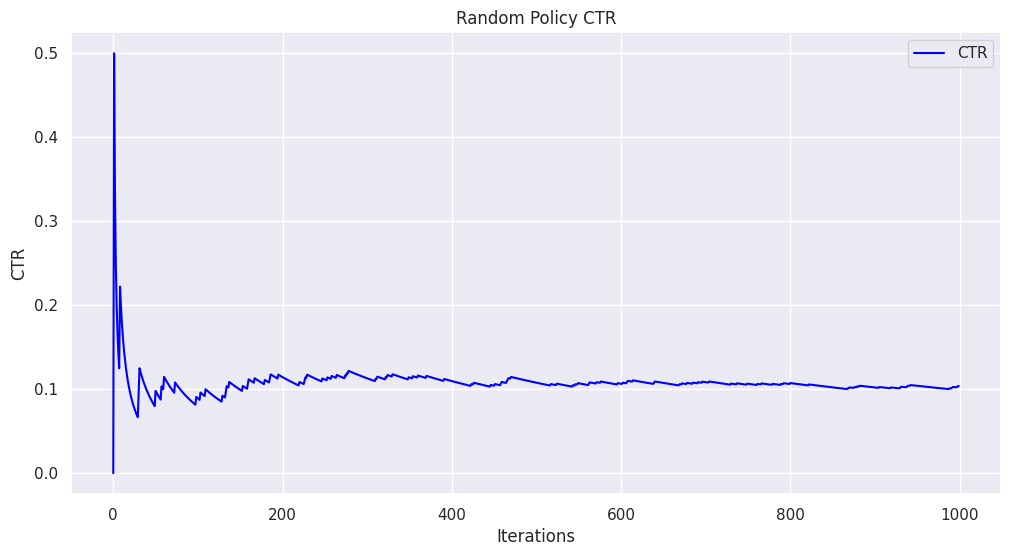

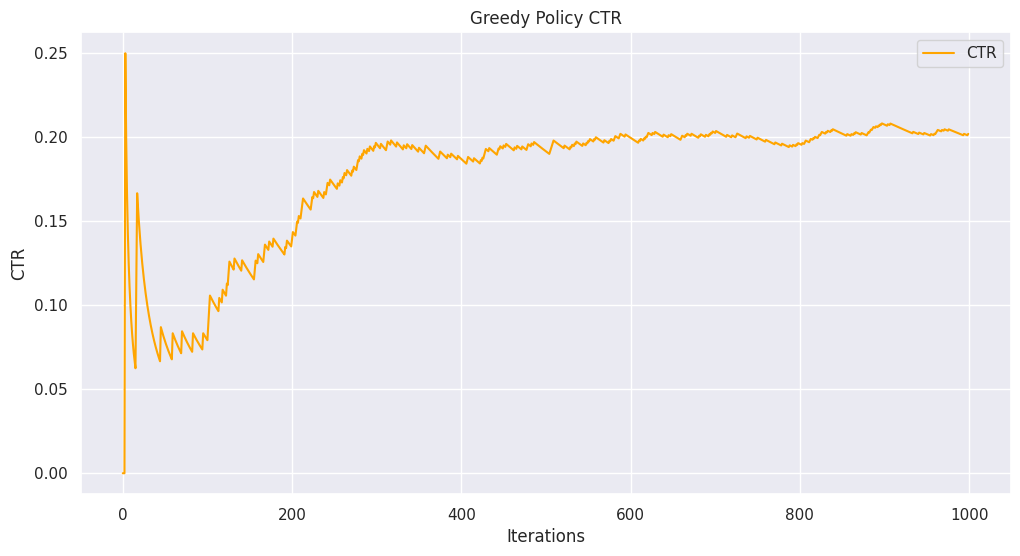

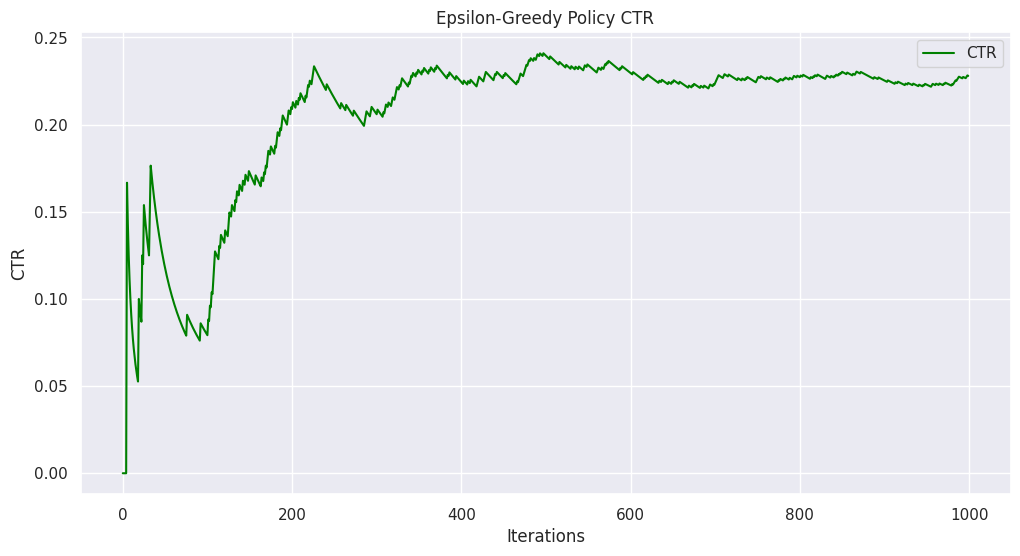

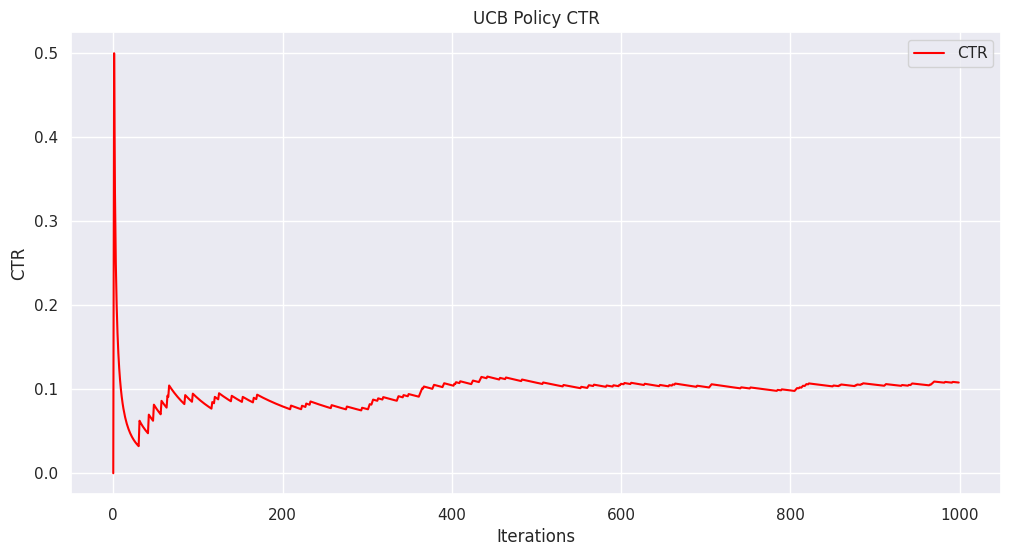

In [16]:
#-----write your code below this line---------
def plot_ctr_distribution(rewards, title, color):
    """
    Purpose:
    Plot the cumulative click-through rate (CTR) distribution over iterations for a given policy.

    Description:
    This function takes a list of rewards (1 for click, 0 for no click) and plots the cumulative
    click-through rate (CTR) as a function of the number of iterations. The plot provides a visual
    representation of how the CTR evolves over time, which helps in evaluating the performance of
    different ad selection policies.

    Parameters:
    - rewards (list): A list of rewards where each element is either 1 (click) or 0 (no click).
    - title (str): The title for the plot, indicating which policy's CTR distribution is being plotted.
    """

    # Set dark background style
    sns.set(style="darkgrid")

    plt.figure(figsize=(12, 6))
    ctr = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
    sns.lineplot(x=np.arange(len(rewards)), y=ctr, label='CTR', color=color)
    plt.xlabel('Iterations')
    plt.ylabel('CTR')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_ctr_distribution(random_rewards, 'Random Policy CTR', color='blue')
plot_ctr_distribution(greedy_rewards, 'Greedy Policy CTR', color='orange')
plot_ctr_distribution(epsilon_greedy_rewards, 'Epsilon-Greedy Policy CTR', color='green')
plot_ctr_distribution(ucb_rewards, 'UCB Policy CTR', color='red')

# Changing Exploration Percentage (1M)
* How does changing the exploration percentage (EXPLORE_PERCENTAGE) affect the performance of the algorithm? Test with different values (e.g. 0.15 and 0.2) and discuss the results.


Iteration 1: Selected Ad - [34 'Male' 'Los Angeles' 'Android' '30-35'], Reward - 0
Iteration 2: Selected Ad - [46 'Female' 'Chicago' 'iOS' '45-50'], Reward - 0
Iteration 3: Selected Ad - [43 'Female' 'Los Angeles' 'iOS' '40-45'], Reward - 0
Iteration 4: Selected Ad - [25 'Male' 'Chicago' 'Other' '25-30'], Reward - 1
Iteration 5: Selected Ad - [43 'Male' 'Los Angeles' 'Android' '40-45'], Reward - 0
Iteration 6: Selected Ad - [27 'Female' 'New York' 'iOS' '25-30'], Reward - 0
Iteration 7: Selected Ad - [33 'Female' 'Phoenix' 'Other' '30-35'], Reward - 0
Iteration 8: Selected Ad - [44 'Female' 'Los Angeles' 'iOS' '40-45'], Reward - 0
Iteration 9: Selected Ad - [27 'Male' 'Los Angeles' 'Android' '25-30'], Reward - 1
Iteration 10: Selected Ad - [49 'Female' 'New York' 'Other' '45-50'], Reward - 0
Iteration 11: Selected Ad - [47 'Female' 'Los Angeles' 'Other' '45-50'], Reward - 0
Iteration 12: Selected Ad - [36 'Male' 'Phoenix' 'iOS' '35-40'], Reward - 0
Iteration 13: Selected Ad - [31 'Male

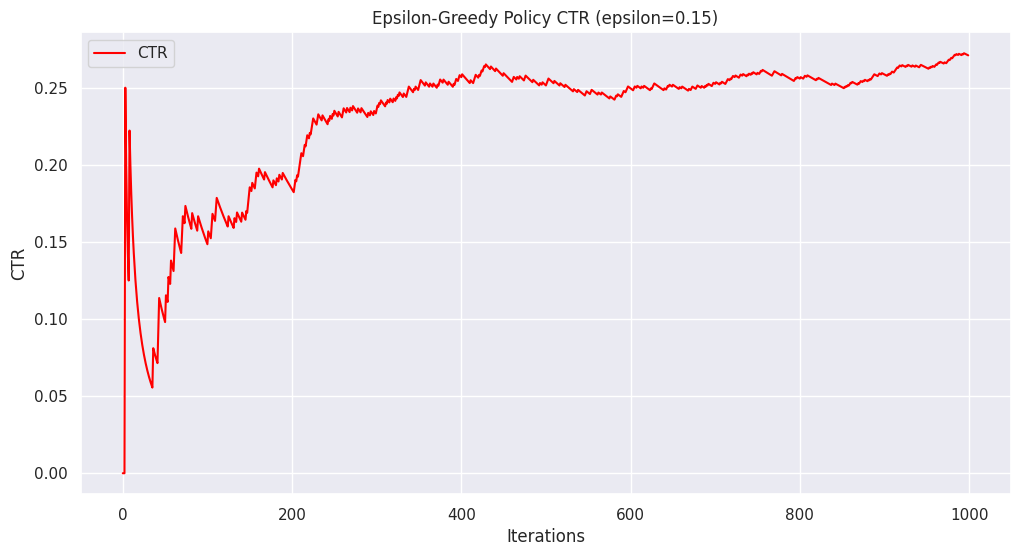

Iteration 1: Selected Ad - [45 'Female' 'New York' 'Android' '45-50'], Reward - 0
Iteration 2: Selected Ad - [46 'Male' 'Houston' 'Other' '45-50'], Reward - 0
Iteration 3: Selected Ad - [28 'Female' 'Phoenix' 'iOS' '25-30'], Reward - 0
Iteration 4: Selected Ad - [40 'Female' 'Chicago' 'Android' '40-45'], Reward - 0
Iteration 5: Selected Ad - [40 'Male' 'Chicago' 'Android' '40-45'], Reward - 0
Iteration 6: Selected Ad - [43 'Female' 'New York' 'Other' '40-45'], Reward - 0
Iteration 7: Selected Ad - [41 'Male' 'Phoenix' 'Other' '40-45'], Reward - 0
Iteration 8: Selected Ad - [32 'Female' 'New York' 'Android' '30-35'], Reward - 0
Iteration 9: Selected Ad - [29 'Female' 'Phoenix' 'Android' '25-30'], Reward - 0
Iteration 10: Selected Ad - [49 'Male' 'Los Angeles' 'Other' '45-50'], Reward - 0
Iteration 11: Selected Ad - [47 'Male' 'Phoenix' 'iOS' '45-50'], Reward - 0
Iteration 12: Selected Ad - [41 'Male' 'Los Angeles' 'Other' '40-45'], Reward - 0
Iteration 13: Selected Ad - [40 'Male' 'New 

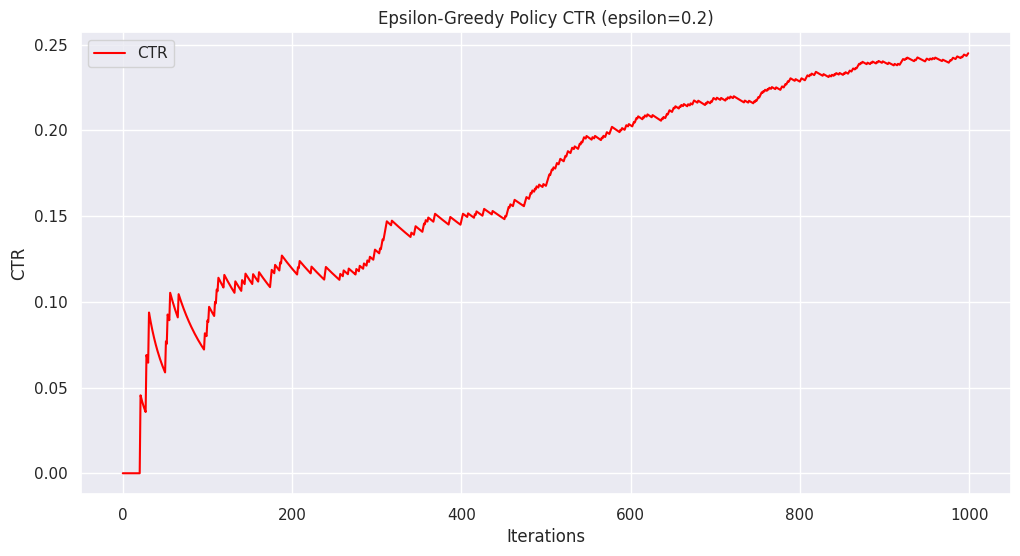

In [18]:
#Implement with any MAB algorithm
#Try with different EXPLORE_PERCENTAGE
#Different value of alpha
for epsilon in [0.15, 0.2]:
    epsilon_greedy_policy = EpsilonGreedyPolicy(epsilon,explore=50)
    epsilon_greedy_rewards = run_simulation(epsilon_greedy_policy, num_iterations)
    plot_ctr_distribution(epsilon_greedy_rewards, f'Epsilon-Greedy Policy CTR (epsilon={epsilon})', color = 'red')

**Changing the exploration percentage** in the epsilon-greedy policy can further fine-tune the balance between exploring new ads and exploiting known high-performing ads. **This is evident from the overall higher ctr value from the graph**. A higher exploration percentage can prevent the policy from getting stuck in local optima, potentially improving long-term performance.

# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for maximizing the CTR using random, greedy, epsilon-greedy and UCB.

`----write below this line------`

Among the four approaches, the **Epsilon-Greedy policy** demonstrates the best performance for maximizing CTR. It consistently achieves a higher CTR with less fluctuation compared to the other methods. The Random policy performs the worst due to its lack of a learning mechanism, while the Greedy policy, although better than Random, gets stuck in local optima. The UCB policy, despite its theoretical advantages, underperforms in this specific setup, possibly requiring further parameter tuning or adaptation.

### Insights from the Graphs:

1. **Random Policy CTR:**
   - The CTR is quite erratic initially and gradually stabilizes, though it remains relatively low compared to the other methods.
   - This is expected as the random policy does not utilize any information from previous iterations to improve its selection process.


2. **Greedy Policy CTR:**
   - The CTR quickly rises and stabilizes, but at a lower level than the Epsilon-Greedy policy.
   - The Greedy policy often gets stuck in local optima as it always chooses the ad with the highest observed CTR, which may not be the globally optimal ad.


3. **Epsilon-Greedy Policy CTR:**
   - The CTR increases rapidly and maintains a relatively high value with less fluctuation.
   - This method balances exploration and exploitation by sometimes choosing a random ad, thus avoiding local optima better than the Greedy policy.


4. **UCB Policy CTR:**
   - The CTR shows significant variation initially but stabilizes at a level lower than the Epsilon-Greedy policy.
   - Despite the exploration term, it seems the UCB policy is not performing as well in this scenario, possibly due to the specific tuning parameters or the nature of the ads and rewards.


In conclusion, for maximizing CTR, the Epsilon-Greedy policy provides a balanced approach to exploration and exploitation, resulting in higher and more stable CTR performance.